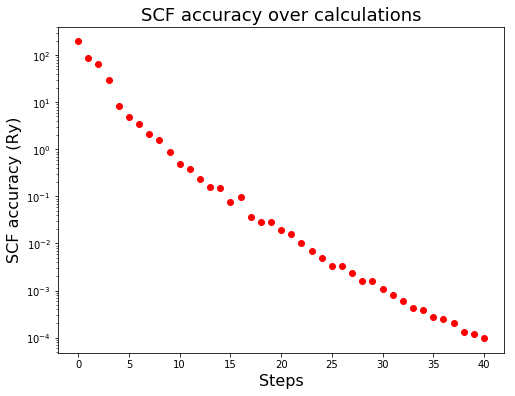

In [7]:
# Dt100 timestep
%matplotlib inline

import math
import numpy as np
import matplotlib.pyplot as plt
import scipy


scf_acu = []
steps = list(range(41))
        

with open( 'scf_accuracy.aug23.1', 'r')  as f:
        for line in f:
            if 'Ry' in line:
                scf_acu.append(float(line.split()[-2]))
                
                

#Plot Total Energy
plt.figure(figsize=(8,6))
plt.semilogy(steps, scf_acu , 'ro')
#plt.axis([0, 41,0,1])
plt.ylabel('SCF accuracy (Ry)', fontsize=16)
plt.xlabel ('Steps', fontsize=16)
plt.title('SCF accuracy over calculations', fontsize=18)
plt.savefig('scf_acu_aug23_1.svg')
plt.show()           

In [47]:
# PAIR DISTANCE CALCULATION

import math
import numpy as np
import matplotlib.pyplot as plt
import scipy

#####
# 

# Open Structure file and replace instances with 'line.replace'
with open("NiPtP.structure.final.aug15.1", "rt") as fin:
    with open("atom_pos", "wt") as fout: 
        for line in fin: 
            fout.write((line.replace('Type_2', 'Pt')).replace('Type_1', 'Ni').replace('Type_3', 'P'))
    
######
# READ IN FILE , USE SPLIT TO SEPERATE OUT ALL VALUES
######

with open('atom_pos') as f:
    lines = f.read().split()


#####
# Multiply out values
#####

# Use float to convert to float numbers


xpos = []
ypos = []
zpos = []
atom = []
text = []

listlen = (len(lines)/4)

n = 1
while n < 1024:
    atom.append(lines[n-1])
    xpos.append(float(lines[n]))
    ypos.append(float(lines[n+1]))
    zpos.append(float(lines[n+2]))
    n += 4

#####
# Options for multiplying position values
# Two possibilities, use map function or list comprehension
# We can now multiply by whatever value we would like
#####



xpos = [round(x / 15.628, 5) for x in xpos]
ypos = [round(x / 15.628, 5) for x in ypos]
zpos = [round(x / 15.628, 5) for x in zpos]


#####
# Section where we put text back together to write out
#####

n = 0
while n < 256:
    text.append((atom[n]+' '+str(xpos[n])+ ' '+str(ypos[n])+ ' '+str(zpos[n])))
    n += 1
    
    
#####
# Write out text
#####

with open('test.txt', 'w') as f:
    for row in text:
        f.write("%s\n" % str(row))


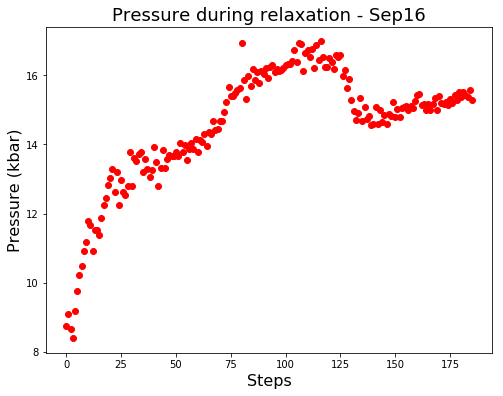

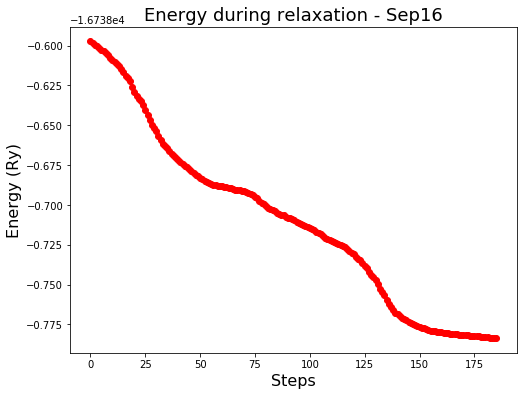

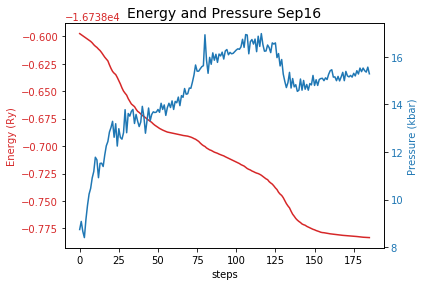

In [9]:
# IMPORT AND RELAX CALCULATIONS RESULTS aug28.5 / aug28.6

import math
import numpy as np
import matplotlib.pyplot as plt
import scipy

pressure = []
trust_r  = []
conv_thr = []
energy   = []
steps    = []
ecut     = [30,35,40,45,50]
ene_ref = [-1438.121,-1438.298,-1438.121,-1438.366,-1438.381]
alat     = [29.36,29.06,29.28,29.14]
press_var = [12.82,76.74,27.56,58.52]

with open( 'pressure.sep16.2', 'r')  as f:
        for line in f:
            if 'P=' in line:
                pressure.append(float(line.split()[-1]))

with open( 'trust_radius.aug28.5', 'r')  as f:
        for line in f:
            if 'bohr' in line:
                trust_r.append(float(line.split()[-2]))
                
with open( 'energy.sep16.2', 'r')  as f:
        for line in f:
            if 'Ry' in line:
                energy.append(float(line.split()[-2]))
                
with open( 'conv_thr.sep4.1', 'r')  as f:
        for line in f:
            if 'Ry' in line:
                conv_thr.append(float(line.split()[-2]))
                
steps = list(range(len(energy)))

#Plot Pressure
plt.figure(figsize=(8,6))
plt.plot(steps, pressure, 'ro')
#plt.axis([0, 41,0,1])
plt.ylabel('Pressure (kbar)', fontsize=16)
plt.xlabel ('Steps', fontsize=16)
plt.title('Pressure during relaxation - Sep16', fontsize=18)
plt.savefig('pressure_sep.16.2.svg')
plt.show()

#Plot Pressure
#plt.figure(figsize=(8,6))
#plt.plot(alat, press_var, 'ro')
#plt.axis([0, 41,0,1])
#plt.ylabel('Pressure (kbar)', fontsize=16)
#plt.xlabel ('alat (bohr)', fontsize=16)
#plt.title('Pressure during lattice var - Aug28', fontsize=18)
#plt.savefig('pressure_var_aug28.svg')
#plt.show()

#Plot Energy
plt.figure(figsize=(8,6))
plt.plot(steps, energy, 'ro')
#plt.axis([0, 41,0,1])
plt.ylabel('Energy (Ry)', fontsize=16)
plt.xlabel ('Steps', fontsize=16)
plt.title('Energy during relaxation - Sep16', fontsize=18)
plt.savefig('energy_sep16.2.svg')
plt.show()



fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('steps')
ax1.set_ylabel('Energy (Ry)', color=color)
ax1.plot(steps,energy,color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx() # instantiate a second axis with shared x-axis

color = 'tab:blue'
ax2.set_ylabel('Pressure (kbar)', color=color)
ax2.plot(steps,pressure,color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() # otherwise the right y-label is slightly clipped
plt.title('Energy and Pressure Sep16', fontsize=14)
plt.savefig('energyNpressure_sep16.2.png')
plt.show()


#Plot Trust Radius
#plt.figure(figsize=(8,6))
#plt.plot(steps, trust_r , 'ro')
#plt.axis([0, 41,0,1])
#plt.ylabel('Trust radius (bohr)', fontsize=16)
#plt.xlabel ('Steps', fontsize=16)
#plt.title('Trust radius during relaxation - Aug28', fontsize=18)
#plt.savefig('trust_radius_aug28.5.svg')
#plt.show()  


#Plot Convergence Threshold
#plt.figure(figsize=(8,6))
#plt.semilogy(steps, conv_thr , 'ro')
#plt.axis([0, 41,0,1])
#plt.ylabel('Conv thr (Ry)', fontsize=16)
#plt.xlabel ('Steps', fontsize=16)
#plt.title('Convergence Threshold Relaxation - sep16', fontsize=18)
#plt.savefig('conv_thr_sep16.2.svg')
#plt.show()

#Plot ecut test
#plt.figure(figsize=(8,6))
#plt.plot(ecut, ene_ref , 'ro')
#plt.axis([0, 41,0,1])
#plt.ylabel('Conv thr (Ry)', fontsize=16)
#plt.xlabel ('Steps', fontsize=16)
#plt.title('Ecut refinement', fontsize=18)
#plt.savefig('ecut_aug28.5.svg')
#plt.show()
